# Imshow and maps coordinates

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/wcsaxes_map_example.html

How to use imshow with a map and overplot points specified by pixel coordinates
and map coordinates.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE

We start with the sample data and create a submap of a smaller region.

In [ ]:
aia = sunpy.map.Map(AIA_171_IMAGE)
top_right = SkyCoord(0 * u.arcsec, 1000 * u.arcsec, frame=aia.coordinate_frame)
bottom_left = SkyCoord(-1000 * u.arcsec, 0 * u.arcsec, frame=aia.coordinate_frame)
smap = aia.submap(bottom_left, top_right=top_right)

By setting the projection of the axis, a WCSAxes is created and this enables
the plot to be created with the map coordinates, in this case helioprojective
coordinates. The standard plot
command expects pixel coordinates. It is also possible to plot a point using the
map coordinates if we pass the transformation but this transform expects
the values to be in degrees and not arcseconds.

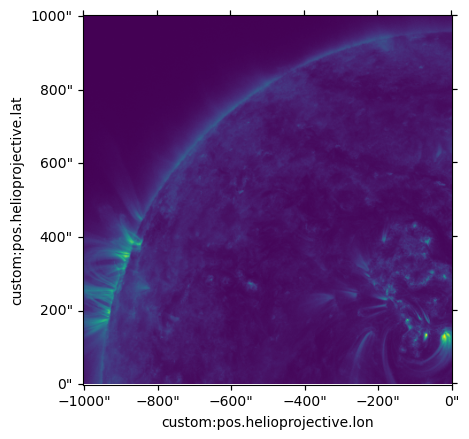

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=smap)

ax.imshow(smap.data)
plt.show()

Add an overlay grid, showing the native coordinates of the map.

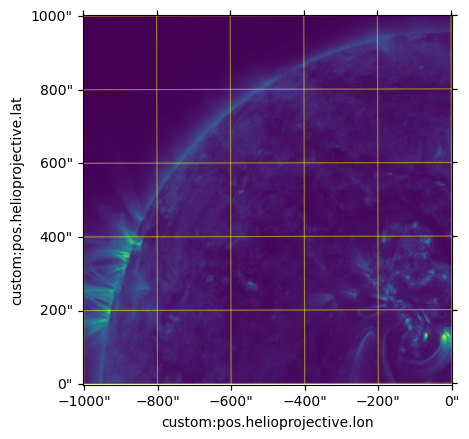

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=smap)

ax.imshow(smap.data)
ax.coords.grid(color='yellow', linestyle='solid', alpha=0.5)
plt.show()

plot a point in the middle of the image

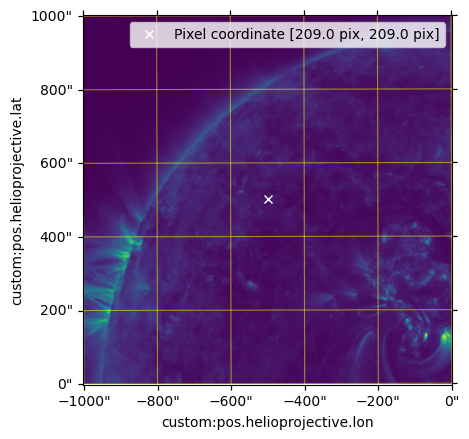

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=smap)

ax.imshow(smap.data)
ax.coords.grid(color='yellow', linestyle='solid', alpha=0.5)
pixel_coord = [smap.data.shape[0]/2., smap.data.shape[1]/2.] * u.pix
ax.plot(pixel_coord[0], pixel_coord[1], 'x', color='white',
        label=f'Pixel coordinate [{pixel_coord[0]}, {pixel_coord[1]}]')
ax.legend()
plt.show()

Using the transform command expects coordinates in degrees and not arcseconds.

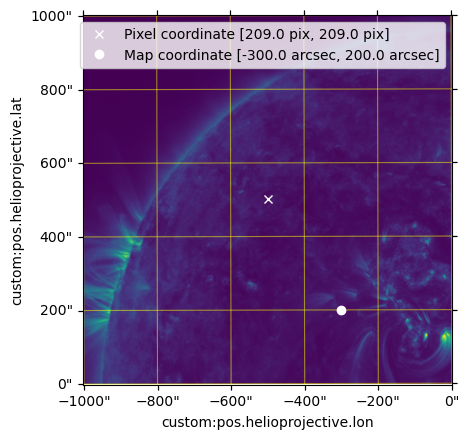

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=smap)

ax.imshow(smap.data)
ax.coords.grid(color='yellow', linestyle='solid', alpha=0.5)
pixel_coord = [smap.data.shape[0]/2., smap.data.shape[1]/2.] * u.pix
ax.plot(pixel_coord[0], pixel_coord[1], 'x', color='white',
        label=f'Pixel coordinate [{pixel_coord[0]}, {pixel_coord[1]}]')
map_coord = ([-300, 200] * u.arcsec)

ax.plot(map_coord[0].to('deg'), map_coord[1].to('deg'), 'o', color='white',
        transform=ax.get_transform('world'),
        label=f'Map coordinate [{map_coord[0]}, {map_coord[1]}]')
ax.legend()
plt.show()